In [60]:
#importar librerias o archivos
#Libreria para el comando del sistema
import os 
#import openpyxl
#libreria para el manejo de datos como lo es pandas
import pandas as pd
import numpy as np
import plotly.express as px 

In [61]:
#cargar informacion 
data=pd.read_excel("datos_airbnbn.xlsx")
data.head(5)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20210409161549,2021-04-12,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,...,10.0,9.0,10.0,NaN,t,1,0,1,0,1.90
1,20168,https://www.airbnb.com/rooms/20168,20210409161549,2021-04-12,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,...,10.0,10.0,9.0,0363 CBB3 2C10 0C2A 1E29,t,2,0,2,0,2.50
2,25428,https://www.airbnb.com/rooms/25428,20210409161549,2021-04-11,"Lovely, 1 bed apt in Ctr (w.lift) -3/20-6/20(f...",Lovely apt in Centre ( lift & fireplace) near ...,NaN,https://a0.muscache.com/pictures/138431/7079a9...,56142,https://www.airbnb.com/users/show/56142,...,10.0,10.0,10.0,NaN,f,2,2,0,0,0.13
3,27886,https://www.airbnb.com/rooms/27886,20210409161549,2021-04-11,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,...,10.0,10.0,10.0,0363 974D 4986 7411 88D8,t,1,0,1,0,1.94
4,28871,https://www.airbnb.com/rooms/28871,20210409161549,2021-04-13,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,https://www.airbnb.com/users/show/124245,...,10.0,10.0,10.0,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,2.59


## ¿Cuál es el tipo de inmueble que más ha publicados Airbnb en la ciudad de Ámsterdam?

In [63]:
#Creamos y usamos la tabla de frecuencia para la variable de "room_type"
data_room=data["room_type"].value_counts().reset_index()
#Cambiamos el nombre de la tabla 
data_room.columns=("room_type","frecuencia")
fig1=px.bar(data_room, x="room_type",y="frecuencia")
fig1.show()

## ¿Qué tipo de habitaciones posee los precios más económicos de la ciudad?



In [65]:
# Paso 1: Convertir a numérico
data['price'] = pd.to_numeric(data['price'], errors='coerce')

# Paso 2: Filtrar valores no nulos y diferentes de cero
data_filtrada = data[data['price'].notna() & (data['price'] != 0)]

# Verificación
print(f"Registros originales: {len(data)}")
print(f"Registros después de filtrar: {len(data_filtrada)}")
print("\nDistribución de precios filtrados:")
print(data_filtrada['price'].describe())

Registros originales: 17825
Registros después de filtrar: 17809

Distribución de precios filtrados:
count    17809.000000
mean       154.634679
std        154.162204
min          4.000000
25%         95.000000
50%        129.000000
75%        180.000000
max       8000.000000
Name: price, dtype: float64


In [66]:
#Discretizar la variable “price” en dos grupos el primero con precios menores a 130 euros y el segundo mayor o igual a 130 euros
# 1. Discretizar la variable price en dos grupos
data_filtrada["price"]

0         59
1        200
2        125
3        141
4         75
        ... 
17820     47
17821    200
17822    112
17823    107
17824     94
Name: price, Length: 17809, dtype: int64

In [67]:
# 1. Discretizar la variable price en dos grupos
data_filtrada['price_group'] = pd.cut(data_filtrada['price'],
                                    bins=[-float('inf'), 130, float('inf')],
                                    labels=['<130€', '≥130€'])

# 2. Contar ocurrencias por grupo para el gráfico
plot_data = data_filtrada.groupby(['room_type', 'price_group']).size().reset_index(name='count')

plot_data

C:\Users\yair_\AppData\Local\Temp\ipykernel_11696\3477278162.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yair_\AppData\Local\Temp\ipykernel_11696\3477278162.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,room_type,price_group,count
0,Entire home/apt,<130€,6099
1,Entire home/apt,≥130€,7797
2,Hotel room,<130€,67
3,Hotel room,≥130€,41
4,Private room,<130€,3148
5,Private room,≥130€,608
6,Shared room,<130€,39
7,Shared room,≥130€,10


In [68]:
# 3. Crear el diagrama de barras agrupado
fig = px.bar(plot_data,
             x='room_type',
             y='count',
             color='price_group',
             barmode='group',
             title='Distribución de tipos de habitación por rango de precio',
             labels={
                 'room_type': 'Tipo de habitación',
                 'count': 'Cantidad de propiedades',
                 'price_group': 'Rango de precio'
             },
             category_orders={'price_group': ['<130€', '≥130€']})

# 4. Personalizar el gráfico
fig.update_layout(
    xaxis_title='Tipo de habitación',
    yaxis_title='Número de propiedades',
    legend_title='Rango de precio'
)

# Mostrar el gráfico
fig.show()

## Pregunta 3¿Cuál es el tipo de habitación que posee la mayor dispersión en sus precios de alquiler?

In [70]:
#Agrupar
fig2=px.box(data_filtrada,x="price",y="room_type",labels={"price": "Precio","room_type":"Tipo de cuarto"})
fig2.show()

## Pregunta 4¿Las casas y apartamentos con las mejores calificaciones de revisión describen altos precios de alquiler?

Revisar el 
caso de uso de Airbnb
, aquí podrás encontrar un diccionario de variables y los datos de la tabla “listing.csv” que esta previamente procesada.

Cargar los datos de la tabla “listing.csv” que esta previamente procesada.

Buscar las variables “price”, “review_scores_rating” y “room_type".

Transformar la variable “price” de carácter a numérica.

Excluir los valores nulos e iguales a 0 de la variable “Price".

Crear dos categorías para la variable “review_scores_rating” la primera menores a 88 puntos y segunda mayores o iguales a 88 puntos.

Construir el diagrama de boxplot de la variable “Price” agrupada inicialmente por la variable “review_scores_rating” y luego por la variable “room_type".

In [73]:
data_filtrada["review_scores_rating"].describe()

count    15187.000000
mean        95.061500
std          7.192617
min         20.000000
25%         93.000000
50%         97.000000
75%        100.000000
max        100.000000
Name: review_scores_rating, dtype: float64

In [80]:
# 1. Discretizar la variable price en dos grupos
data_filtrada["rsr"] = pd.cut(data_filtrada["review_scores_rating"],
                                    bins=[-float('inf'), 88, float('inf')],
                                    labels=['<88', '≥88'])

C:\Users\yair_\AppData\Local\Temp\ipykernel_11696\1146729274.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



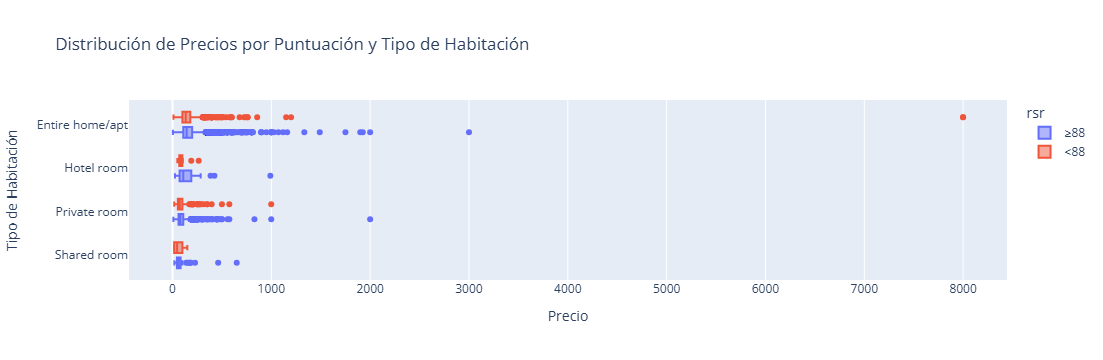

In [122]:
fig3= px.box(
    data_filtrada,
    x="price",
    y="room_type",
    color="rsr",
    title="Distribución de Precios por Puntuación y Tipo de Habitación",
    labels={
        "rating_group": "Grupo de Puntuación",
        "price": "Precio",
        "room_type": "Tipo de Habitación"
    },
    category_orders={"rating_group": ["<88 puntos", "≥88 puntos"],"room_type": sorted(data_filtrada["room_type"].unique())}
)
fig3.show()